---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 0
r-space dimension           = 3
number of spin components   = 1
periodic directions         = []
number of orbitals          = 4
number of electronic states = 4
lattice vectors:
 #  0  ===>  [     1.0 ,     0.0 ,     0.0 ]
 #  1  ===>  [     0.0 ,     1.0 ,     0.0 ]
 #  2  ===>  [     0.0 ,     0.0 ,     1.0 ]
positions of orbitals:
 #  0  ===>  [  0.5774 ,     0.0 ,     0.0 ]
 #  1  ===>  [ -0.2887 ,     0.5 ,     0.0 ]
 #  2  ===>  [ -0.2887 ,    -0.5 ,     0.0 ]
 #  3  ===>  [     0.0 ,     0.0 ,     1.0 ]
site energies:
 #  0  ===>      -0.5
 #  1  ===>      -0.5
 #  2  ===>      -0.5
 #  3  ===>       0.5
hoppings:
<  0 | H |  1 >     ===>      0.1 +     0.1 i
<  0 | H |  2 >     ===>      0.1 +     0.1 i
<  0 | H |  3 >     ===>      0.0 +     1.0 i
<  1 | H |  2 >     ===>      0.1 +     0.1 i
<  1 | H |  3 >     ===>      0.0 +     1.0 i

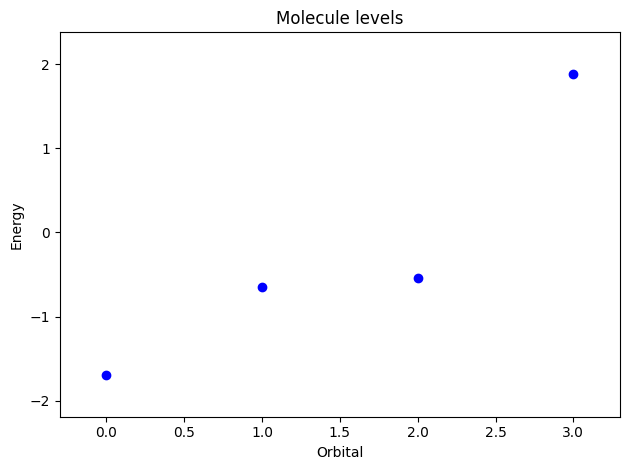

In [24]:

from __future__ import print_function
from pythtb import * # import TB model class
import numpy as np
import matplotlib.pyplot as plt

# define lattice vectors
lat=[[1.0,0.0,0.0],[0.0,1.0,0.0],[0.0,0.0,1.0]]
# define coordinates of orbitals
sq32=np.sqrt(3.0)/2.0
orb=[[ (2./3.)*sq32, 0.   ,0.],
     [(-1./3.)*sq32, 1./2.,0.],
     [(-1./3.)*sq32,-1./2.,0.],
     [  0.         , 0.   ,1.]]
# make zero dimensional tight-binding model
my_model=tb_model(0,3,lat,orb)

# set model parameters
delta=0.5
t_first=0.1 # H-H
t_second=1.0 # N-H  

# change on-site energies so that N and H don't have the same energy
my_model.set_onsite([-delta,-delta,-delta,delta])

# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j)
# Hamiltonian dressing: setti gli elementi extradiagonali
my_model.set_hop(t_first, 0, 1) # H1->H2
my_model.set_hop(t_first, 0, 2) # H1->H3
my_model.set_hop(t_second, 0, 3) # H1->N1
my_model.set_hop(t_first, 1, 2) # H2->H3
my_model.set_hop(t_second, 1, 3) # H2->N1
my_model.set_hop(t_second, 2, 3) # H3->N1

# print tight-binding model
my_model.display()


print('---------------------------------------')
print('starting calculation')
print('---------------------------------------')
print('Calculating bands...')
print()
print('Band energies')
print()    


# solve for eigenenergies of hamiltonian
evals=my_model.solve_all()

# First make a figure object
fig, ax = plt.subplots()
# plot all states
ax.plot(evals,"bo")
ax.set_xlim(-0.3,3.3)
ax.set_ylim(evals.min()-0.5,evals.max()+0.5)
# put title
ax.set_title("Molecule levels")
ax.set_xlabel("Orbital")
ax.set_ylabel("Energy")
# make an PDF figure of a plot
fig.tight_layout()
fig.savefig("0dim_spectrum.pdf")                    


print('Done.\n')

---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 0
r-space dimension           = 3
number of spin components   = 1
periodic directions         = []
number of orbitals          = 5
number of electronic states = 5
lattice vectors:
 #  0  ===>  [     1.0 ,     0.0 ,     0.0 ]
 #  1  ===>  [     0.0 ,     1.0 ,     0.0 ]
 #  2  ===>  [     0.0 ,     0.0 ,     1.0 ]
positions of orbitals:
 #  0  ===>  [  0.5774 ,     0.0 ,     0.0 ]
 #  1  ===>  [ -0.2887 ,     0.5 ,     0.0 ]
 #  2  ===>  [ -0.2887 ,    -0.5 ,     0.0 ]
 #  3  ===>  [     0.0 ,     0.0 ,     2.2 ]
 #  4  ===>  [     0.0 ,     0.0 ,     1.0 ]
site energies:
 #  0  ===>      -0.5
 #  1  ===>      -0.5
 #  2  ===>      -0.5
 #  3  ===>      -0.5
 #  4  ===>       0.5
hoppings:
<  0 | H |  1 >     ===>      0.5 +     0.0 i
<  0 | H |  2 >     ===>      0.5 +     0.0 i
<  0 | H |  3 >     ===>      0.5 +     0.0 i
<  0 | H |  4 >     ===>

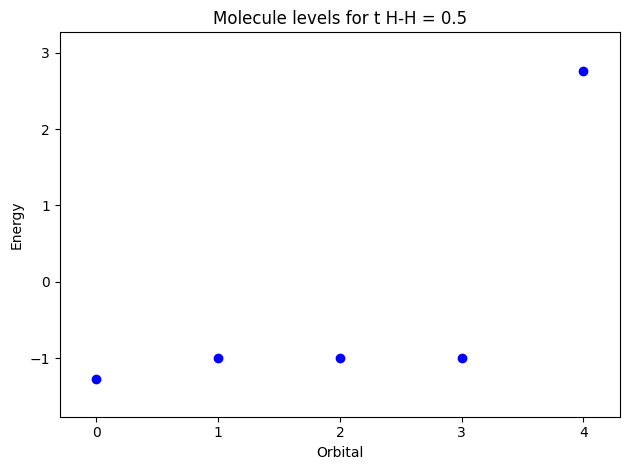

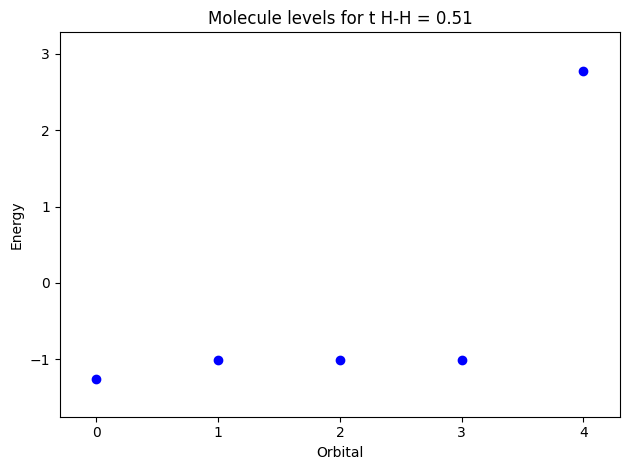

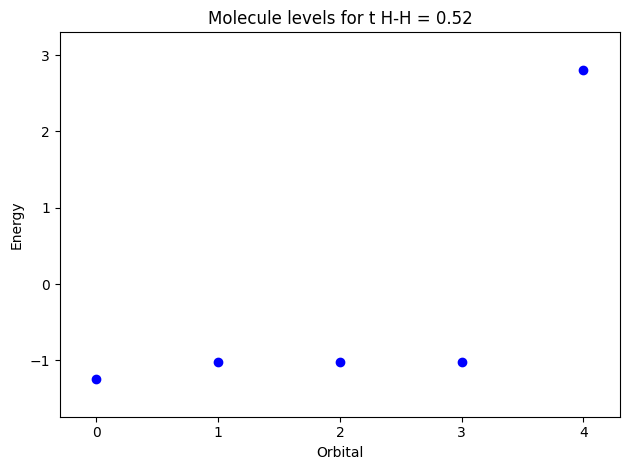

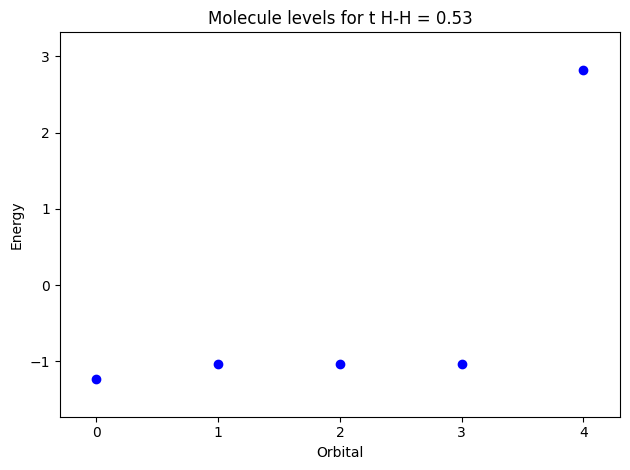

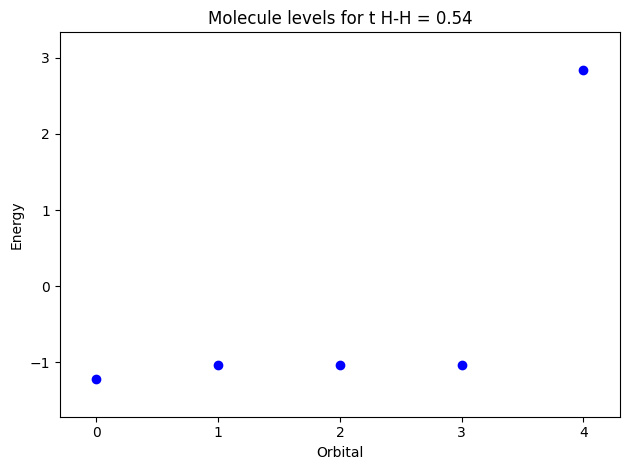

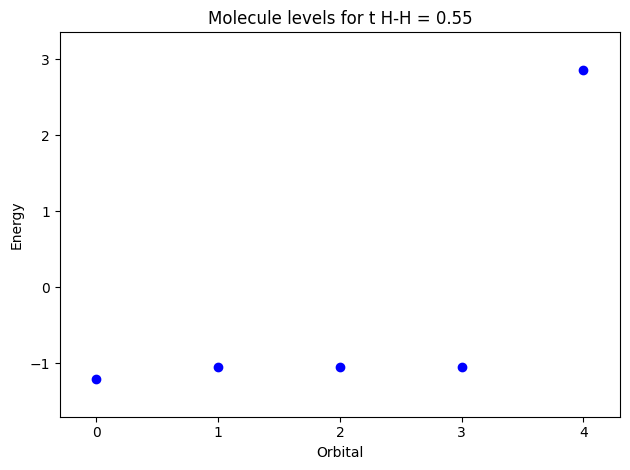

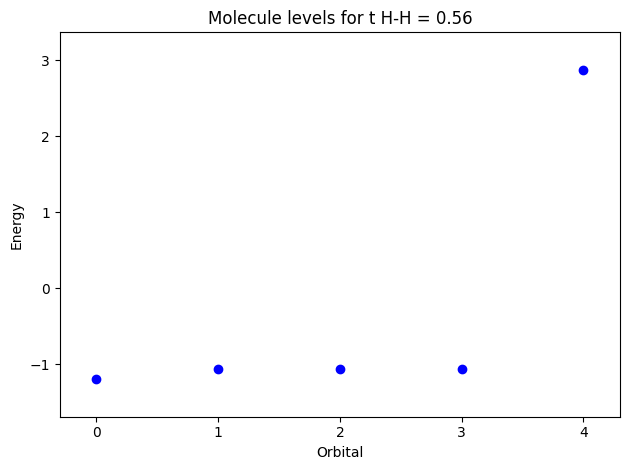

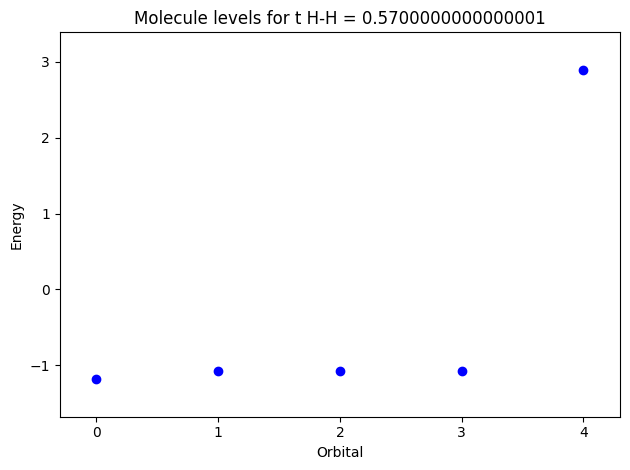

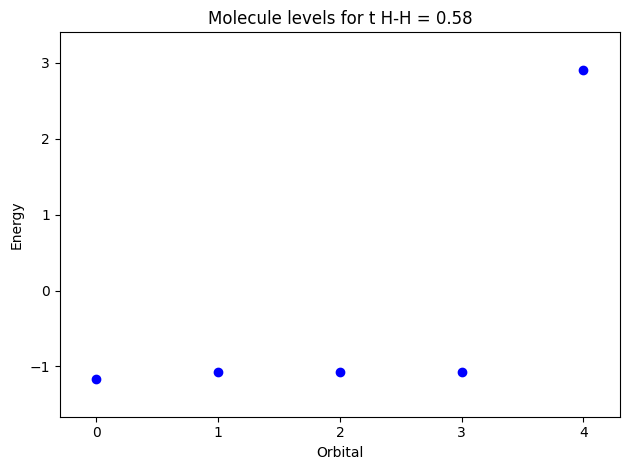

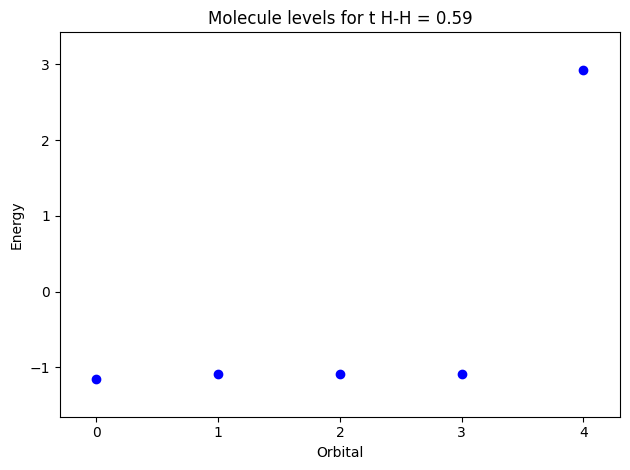

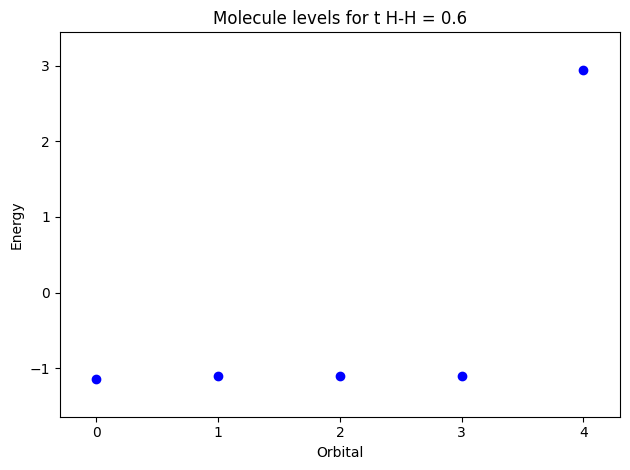

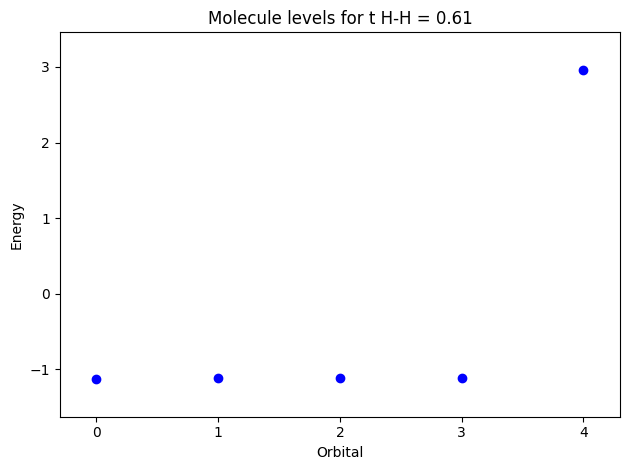

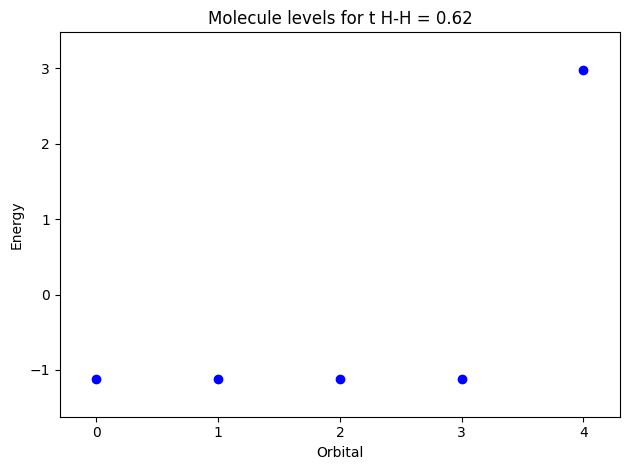

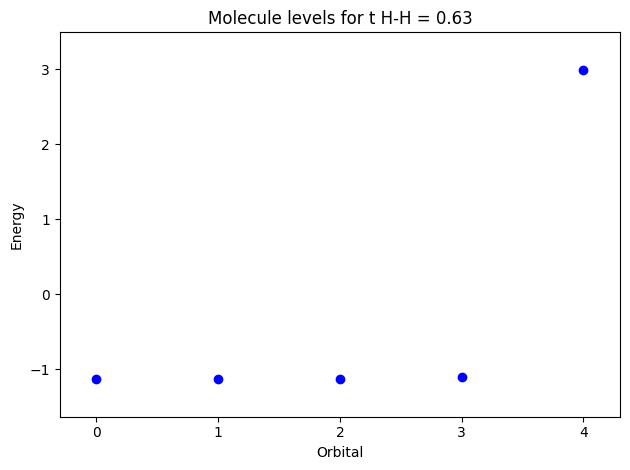

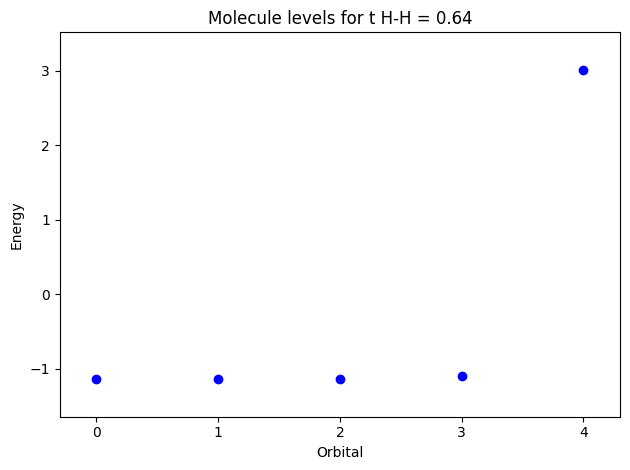

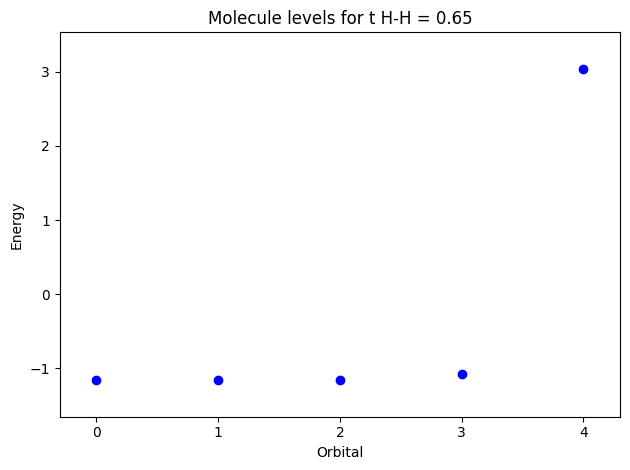

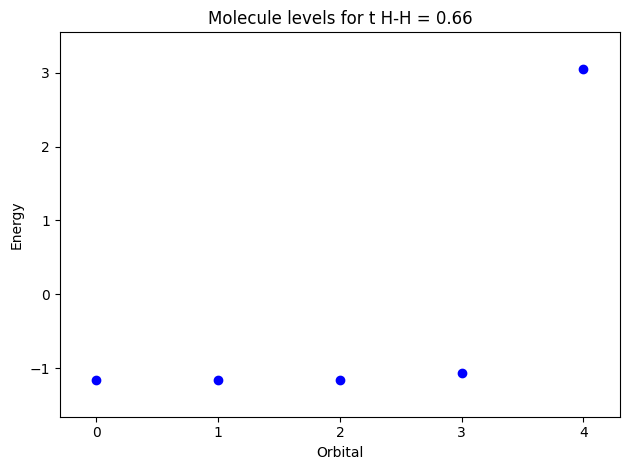

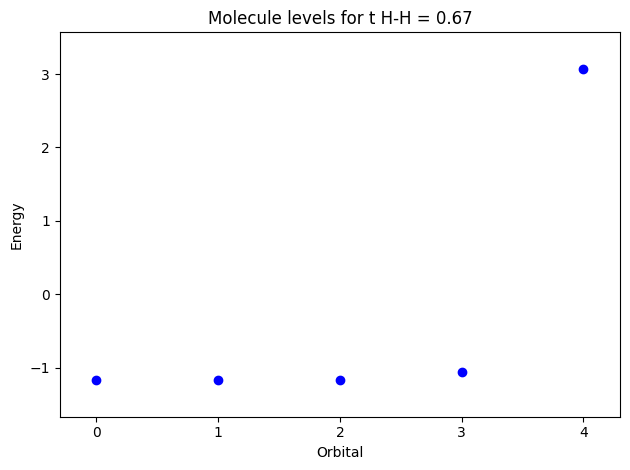

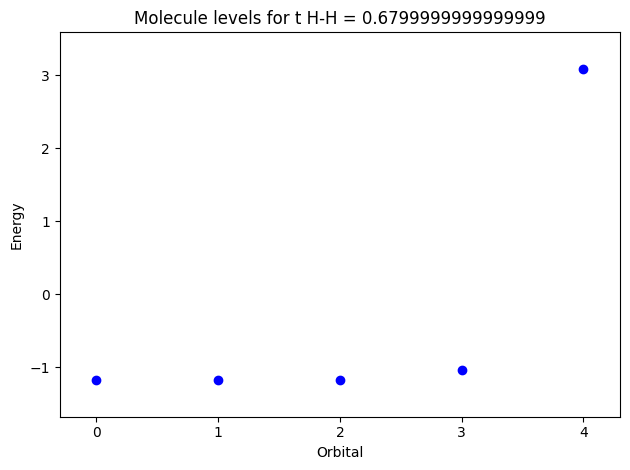

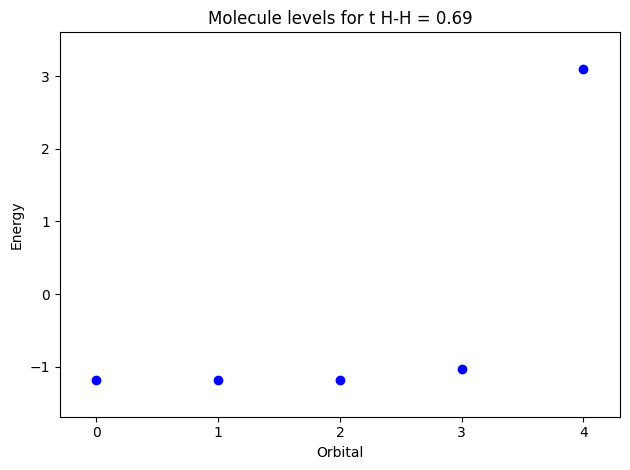

In [41]:

from __future__ import print_function
from pythtb import * # import TB model class
import numpy as np
import matplotlib.pyplot as plt

# define lattice vectors
lat=[[1.0,0.0,0.0],[0.0,1.0,0.0],[0.0,0.0,1.0]]
# define coordinates of orbitals
sq32=np.sqrt(3.0)/2.0
orb=[[ (2./3.)*sq32, 0.   ,0.],    #H1
     [(-1./3.)*sq32, 1./2.,0.],    #H2
     [(-1./3.)*sq32,-1./2.,0.],    #H3 
     [  0.         , 0.   ,2.2],   #H4
     [  0.         , 0.   ,1.]]    #C1
# make zero dimensional tight-binding model
my_model=tb_model(0,3,lat,orb)

# set model parameters
delta=0.5
# change on-site energies so that N and H don't have the same energy
my_model.set_onsite([-delta,-delta,-delta,-delta,delta])

for i in range(0,20):
     t_first=0.5 + 0.01*i # H-H
     t_second=1.0 # C-H  



     # set hoppings (one for each connected pair of orbitals)
     # (amplitude, i, j)
     # Hamiltonian dressing: setti gli elementi extradiagonali
     my_model.set_hop(t_first, 0, 1,mode="reset") # H1->H2
     my_model.set_hop(t_first, 0, 2,mode="reset") # H1->H3
     my_model.set_hop(t_first, 0, 3,mode="reset") # H1->C1
     my_model.set_hop(t_second, 0, 4,mode="reset")

     my_model.set_hop(t_first, 1, 2,mode="reset") # H2->H3
     my_model.set_hop(t_first, 1, 3,mode="reset") # H2->C1
     my_model.set_hop(t_second, 1, 4,mode="reset") # H2->H3

     my_model.set_hop(t_first, 2, 3,mode="reset") # H3->C1
     my_model.set_hop(t_second, 2, 4,mode="reset") # H2->H3

     my_model.set_hop(t_second, 3, 4,mode="reset")

     # print tight-binding model
     my_model.display()


     print('---------------------------------------')
     print('starting calculation for hopping H-H =', t_first)
     print('---------------------------------------')
     print('Calculating bands...')
     print()
     print('Band energies')
     print()    


     # solve for eigenenergies of hamiltonian
     evals=my_model.solve_all()

     # First make a figure object
     fig, ax = plt.subplots()
     # plot all states
     ax.plot(evals,"bo")
     ax.set_xlim(-0.3,4.3)
     ax.set_ylim(evals.min()-0.5,evals.max()+0.5)
     # put title
     title_S= "Molecule levels for t H-H = "+ str(t_first)
     ax.set_title(title_S)
     ax.set_xlabel("Orbital")
     ax.set_ylabel("Energy")
     # make an PDF figure of a plot
     fig.tight_layout()
     fig.savefig("0dim_spectrum.pdf")                    


     print('Done.\n')


*POLIACETILENE*


 Path in 1D BZ defined by nodes at [-0.5  0.   0.5]

---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 1
r-space dimension           = 1
number of spin components   = 1
periodic directions         = [0]
number of orbitals          = 2
number of electronic states = 2
lattice vectors:
 #  0  ===>  [     1.0 ]
positions of orbitals:
 #  0  ===>  [     0.0 ]
 #  1  ===>  [     1.0 ]
site energies:
 #  0  ===>       0.5
 #  1  ===>       0.5
hoppings:
<  0 | H |  1 + [  0 ] >     ===>      1.0 +     0.0 i
<  1 | H |  0 + [  1 ] >     ===>      1.1 +     0.0 i
hopping distances:
|  pos(  0 )  - pos(  1 + [  0 ] ) |  =       1.0
|  pos(  1 )  - pos(  0 + [  1 ] ) |  =       0.0

---------------------------------------
starting calculation
---------------------------------------
Calculating bands...

Band energies

Done.



<>:16: SyntaxWarning: invalid escape sequence '\p'
<>:16: SyntaxWarning: invalid escape sequence '\p'
<>:16: SyntaxWarning: invalid escape sequence '\p'
<>:16: SyntaxWarning: invalid escape sequence '\p'
/var/folders/77/0cj3w6vx37gcpgjsrhjp1y_r0000gn/T/ipykernel_12294/964994934.py:16: SyntaxWarning: invalid escape sequence '\p'
  k_label = ["r$-\pi$", "r$_0$", "r$\pi$"]
/var/folders/77/0cj3w6vx37gcpgjsrhjp1y_r0000gn/T/ipykernel_12294/964994934.py:16: SyntaxWarning: invalid escape sequence '\p'
  k_label = ["r$-\pi$", "r$_0$", "r$\pi$"]


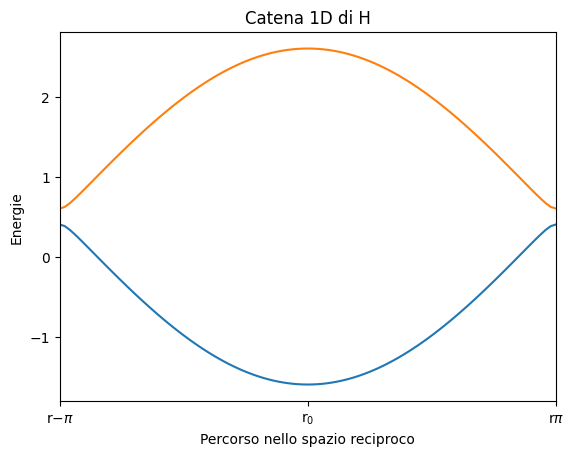

In [65]:

from __future__ import print_function
from pythtb import * # import TB model class
import numpy as np
import matplotlib.pyplot as plt

# define lattice vectors
lat=[[1.0]]
# define coordinates of orbitals
sq32=np.sqrt(3.0)/2.0
orb=[[0.], # C1
     [1.]]#C2
# make zero dimensional tight-binding model
my_model=tb_model(1,1,lat,orb)

(k_vec,k_dist,k_node) = my_model.k_path('fullc', 100)
k_label = ["r$-\pi$", "r$_0$", "r$\pi$"]

# set model parameters
delta=0.5
t1=1.0 # C=C intra cell 
t2=1.1 # C-C inter cell


# change on-site energies so that N and H don't have the same energy
my_model.set_onsite([delta,delta])

# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j)
# Hamiltonian dressing: setti gli elementi extradiagonali
my_model.set_hop(t1,0, 1, [0]) # C1->H1
my_model.set_hop(t2,1, 0, [1]) # C1->C2


# print tight-binding model
my_model.display()


print('---------------------------------------')
print('starting calculation')
print('---------------------------------------')
print('Calculating bands...')
print()
print('Band energies')
print()    


# solve for eigenenergies of hamiltonian
evals=my_model.solve_all(k_vec)


fig, ax = plt.subplots()
ax.plot(k_dist,evals[0])
ax.plot(k_dist,evals[1])

ax.set_title("Catena 1D di H")
ax.set_xlabel("Percorso nello spazio reciproco")
ax.set_ylabel("Energie")
ax.set_xticks(k_node)
ax.set_xticklabels(k_label)
ax.set_xlim(k_node[0],k_node[-1])
              


print('Done.\n')

----- k_path report begin ----------
real-space lattice vectors
 [[1. 0.]
 [0. 1.]]
k-space metric tensor
 [[1. 0.]
 [0. 1.]]
internal coordinates of nodes
 [[0.  0. ]
 [0.5 0. ]
 [0.5 0.5]
 [0.  0. ]]
reciprocal-space lattice vectors
 [[1. 0.]
 [0. 1.]]
cartesian coordinates of nodes
 [[0.  0. ]
 [0.5 0. ]
 [0.5 0.5]
 [0.  0. ]]
list of segments:
  length =     0.5  from  [0. 0.]  to  [0.5 0. ]
  length =     0.5  from  [0.5 0. ]  to  [0.5 0.5]
  length = 0.70711  from  [0.5 0.5]  to  [0. 0.]
node distance list: [0.      0.5     1.      1.70711]
node index list:    [ 0 29 58 99]
----- k_path report end ------------

---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 2
r-space dimension           = 2
number of spin components   = 1
periodic directions         = [0, 1]
number of orbitals          = 1
number of electronic states = 1
lattice vectors:
 #  0  ===>  [     1.0 ,     0.0 ]
 #  1  ===>  [  

<>:18: SyntaxWarning: invalid escape sequence '\G'
<>:18: SyntaxWarning: invalid escape sequence '\G'
<>:18: SyntaxWarning: invalid escape sequence '\G'
<>:18: SyntaxWarning: invalid escape sequence '\G'
/var/folders/77/0cj3w6vx37gcpgjsrhjp1y_r0000gn/T/ipykernel_12294/2684393193.py:18: SyntaxWarning: invalid escape sequence '\G'
  k_label = ["$\Gamma$", "$X$", "$M$", "$\Gamma$"]
/var/folders/77/0cj3w6vx37gcpgjsrhjp1y_r0000gn/T/ipykernel_12294/2684393193.py:18: SyntaxWarning: invalid escape sequence '\G'
  k_label = ["$\Gamma$", "$X$", "$M$", "$\Gamma$"]


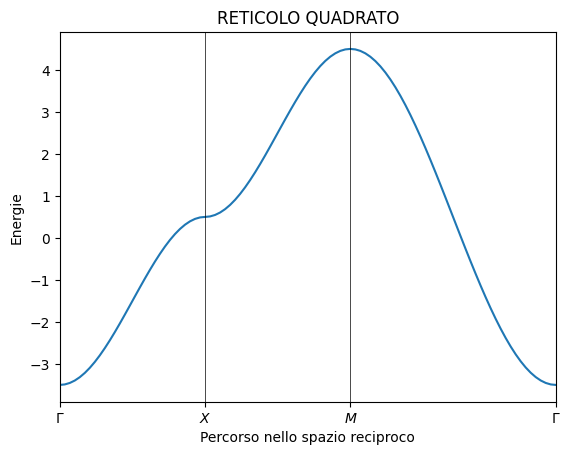

In [77]:

from __future__ import print_function
from pythtb import * # import TB model class
import numpy as np
import matplotlib.pyplot as plt

# define lattice vectors
lat=[[1.0,0],[0.,1.]]
# define coordinates of orbitals

orb=[[0.,0.]] 
# make zero dimensional tight-binding model
my_model=tb_model(2,2,lat,orb)



path = [0.0,0.0],[0.5,0.], [0.5,0.5], [0.0,0.0]
(k_vec,k_dist,k_node) = my_model.k_path(path, 100)
k_label = ["$\Gamma$", "$X$", "$M$", "$\Gamma$"]

# set model parameters
delta=0.5
t1=-1.0 # C=C
t2=0.5 # C-C / C-H  


# change on-site energies so that N and H don't have the same energy
my_model.set_onsite([delta])

# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j)
# Hamiltonian dressing: setti gli elementi extradiagonali


# HO MESSO UN SOLO ORBITALE NELLA MIA CELLA E LO TRASLO. 
my_model.set_hop(t1,0, 0, [1.,0.])
my_model.set_hop(t1,0, 0, [0.,1.])




# print tight-binding model
my_model.display()


print('---------------------------------------')
print('starting calculation')
print('---------------------------------------')
print('Calculating bands...')
print()
print('Band energies')
print()    


# solve for eigenenergies of hamiltonian
evals=my_model.solve_all(k_vec)


fig, ax = plt.subplots()
ax.plot(k_dist,evals[0])
#ax.plot(k_dist,evals[1])

ax.set_title("RETICOLO QUADRATO")
ax.set_xlabel("Percorso nello spazio reciproco")
ax.set_ylabel("Energie")
ax.set_xticks(k_node)
ax.set_xticklabels(k_label)
ax.set_xlim(k_node[0],k_node[-1])
for n in range(len(k_node)):
    ax.axvline(x=k_node[n], linewidth=0.5,color='k')
              


print('Done.\n')

*ADESSO UN RETICOLO QUADRATO CON DUE ATOMI NELLA BASE*

----- k_path report begin ----------
real-space lattice vectors
 [[1. 0.]
 [0. 1.]]
k-space metric tensor
 [[1. 0.]
 [0. 1.]]
internal coordinates of nodes
 [[0.  0. ]
 [0.5 0. ]
 [0.5 0.5]
 [0.  0. ]]
reciprocal-space lattice vectors
 [[1. 0.]
 [0. 1.]]
cartesian coordinates of nodes
 [[0.  0. ]
 [0.5 0. ]
 [0.5 0.5]
 [0.  0. ]]
list of segments:
  length =     0.5  from  [0. 0.]  to  [0.5 0. ]
  length =     0.5  from  [0.5 0. ]  to  [0.5 0.5]
  length = 0.70711  from  [0.5 0.5]  to  [0. 0.]
node distance list: [0.      0.5     1.      1.70711]
node index list:    [ 0 29 58 99]
----- k_path report end ------------

---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 2
r-space dimension           = 2
number of spin components   = 1
periodic directions         = [0, 1]
number of orbitals          = 2
number of electronic states = 2
lattice vectors:
 #  0  ===>  [     1.0 ,     0.0 ]
 #  1  ===>  [  

<>:18: SyntaxWarning: invalid escape sequence '\G'
<>:18: SyntaxWarning: invalid escape sequence '\G'
<>:18: SyntaxWarning: invalid escape sequence '\G'
<>:18: SyntaxWarning: invalid escape sequence '\G'
/var/folders/77/0cj3w6vx37gcpgjsrhjp1y_r0000gn/T/ipykernel_12294/2640949343.py:18: SyntaxWarning: invalid escape sequence '\G'
  k_label = ["$\Gamma$", "$X$", "$M$", "$\Gamma$"]
/var/folders/77/0cj3w6vx37gcpgjsrhjp1y_r0000gn/T/ipykernel_12294/2640949343.py:18: SyntaxWarning: invalid escape sequence '\G'
  k_label = ["$\Gamma$", "$X$", "$M$", "$\Gamma$"]


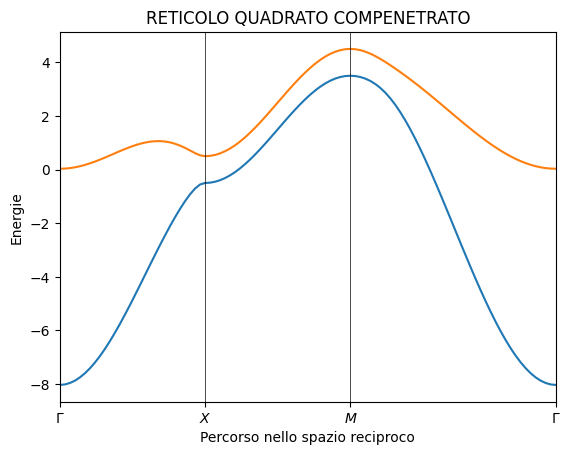

In [79]:



from __future__ import print_function
from pythtb import * # import TB model class
import numpy as np
import matplotlib.pyplot as plt

# define lattice vectors
lat=[[1.0,0],[0.,1.]]
# define coordinates of orbitals

orb=[[0.25,0.25],[-0.25,-0.25]] 
# make zero dimensional tight-binding model
my_model=tb_model(2,2,lat,orb)



path = [0.0,0.0],[0.5,0.], [0.5,0.5], [0.0,0.0]
(k_vec,k_dist,k_node) = my_model.k_path(path, 100)
k_label = ["$\Gamma$", "$X$", "$M$", "$\Gamma$"]

# set model parameters
delta=0.5
t1 = -1.0 # C=C
t2 = -0.5 # C-C / C-H  


# change on-site energies so that N and H don't have the same energy
my_model.set_onsite([delta,-delta])

# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j)
# Hamiltonian dressing: setti gli elementi extradiagonali


# ADESSO CONSIDERO TUTTE LE INTERAZIONI POSSIBILI: 4 t1 e 4 t2 per un tot di 8

my_model.set_hop(t1,0, 0, [1.,0.])
my_model.set_hop(t1,0, 0, [0.,1.])
my_model.set_hop(t1,1, 1, [1.,0.])
my_model.set_hop(t1,1, 1, [0.,1.])

my_model.set_hop(t1,1, 0, [1.,0.])
my_model.set_hop(t1,1, 0, [0.,1.])
my_model.set_hop(t1,0, 1, [0.,0.])
my_model.set_hop(t1,1, 0, [1.,1.])






# print tight-binding model
my_model.display()


print('---------------------------------------')
print('starting calculation')
print('---------------------------------------')
print('Calculating bands...')
print()
print('Band energies')
print()    


# solve for eigenenergies of hamiltonian
evals=my_model.solve_all(k_vec)


fig, ax = plt.subplots()
ax.plot(k_dist,evals[0])
ax.plot(k_dist,evals[1])

ax.set_title("RETICOLO QUADRATO COMPENETRATO")
ax.set_xlabel("Percorso nello spazio reciproco")
ax.set_ylabel("Energie")
ax.set_xticks(k_node)
ax.set_xticklabels(k_label)
ax.set_xlim(k_node[0],k_node[-1])

for n in range(len(k_node)):
    ax.axvline(x=k_node[n], linewidth=0.5,color='k')


print('Done.\n')

*GRAFENE*

----- k_path report begin ----------
real-space lattice vectors
 [[ 0.866 -0.5  ]
 [ 0.866  0.5  ]]
k-space metric tensor
 [[ 1.33335 -0.66665]
 [-0.66665  1.33335]]
internal coordinates of nodes
 [[0.      0.     ]
 [0.5     0.5    ]
 [0.33333 0.66666]
 [0.      0.     ]]
reciprocal-space lattice vectors
 [[ 0.57737 -1.     ]
 [ 0.57737  1.     ]]
cartesian coordinates of nodes
 [[0.00000e+00 0.00000e+00]
 [5.77367e-01 5.55112e-17]
 [5.77361e-01 3.33330e-01]
 [0.00000e+00 0.00000e+00]]
list of segments:
  length = 0.57737  from  [0. 0.]  to  [0.5 0.5]
  length = 0.33333  from  [0.5 0.5]  to  [0.33333 0.66666]
  length = 0.66667  from  [0.33333 0.66666]  to  [0. 0.]
node distance list: [0.      0.57737 0.9107  1.57737]
node index list:    [   0  512  808 1399]
----- k_path report end ------------

---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 2
r-space dimension           = 2
number of spin co

<>:21: SyntaxWarning: invalid escape sequence '\G'
<>:21: SyntaxWarning: invalid escape sequence '\G'
<>:21: SyntaxWarning: invalid escape sequence '\G'
<>:21: SyntaxWarning: invalid escape sequence '\G'
/var/folders/77/0cj3w6vx37gcpgjsrhjp1y_r0000gn/T/ipykernel_12294/1086606216.py:21: SyntaxWarning: invalid escape sequence '\G'
  k_label = ["$\Gamma$", "$M$", "$K$", "$\Gamma$"]
/var/folders/77/0cj3w6vx37gcpgjsrhjp1y_r0000gn/T/ipykernel_12294/1086606216.py:21: SyntaxWarning: invalid escape sequence '\G'
  k_label = ["$\Gamma$", "$M$", "$K$", "$\Gamma$"]


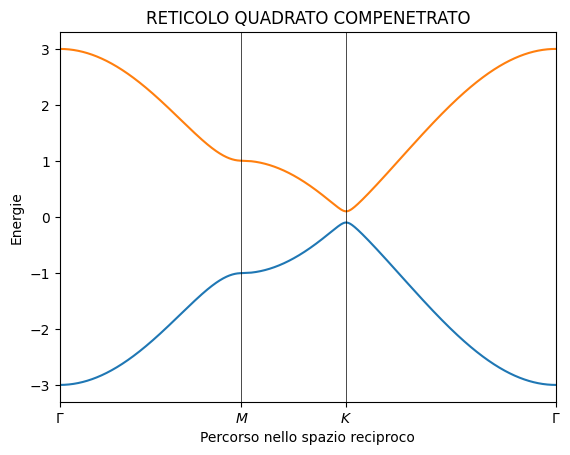

In [101]:



from __future__ import print_function
from pythtb import * # import TB model class
import numpy as np
import matplotlib.pyplot as plt

# define lattice vectors
lat=[[0.866,-0.5],[0.866,0.5]]
#lat = [[1.,0],[0.,1.]]
# define coordinates of orbitals

orb=[[0.0,0.0],[0.5,0.5]]


# make zero dimensional tight-binding model
my_model=tb_model(2,2,lat,orb)



path = [0.0,0.0],[0.5,0.5], [0.33333,0.66666], [0.0,0.0]
(k_vec,k_dist,k_node) = my_model.k_path(path, 1400)
k_label = ["$\Gamma$", "$M$", "$K$", "$\Gamma$"]

# set model parameters
delta=0.0 # se vuoi non grafene ma BN lo setti diverso da zero
t1 = -1.0 # C=C
#t2 = -0.5 # C-C / C-H  


# change on-site energies so that N and H don't have the same energy
my_model.set_onsite([-delta,delta])

# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j)
# Hamiltonian dressing: setti gli elementi extradiagonali




my_model.set_hop(t1,1, 0, [0.,0.])
my_model.set_hop(t1,1, 0, [1.,0])
my_model.set_hop(t1,1, 0, [0.,1.])






# print tight-binding model
my_model.display()


print('---------------------------------------')
print('starting calculation')
print('---------------------------------------')
print('Calculating bands...')
print()
print('Band energies')
print()    


# solve for eigenenergies of hamiltonian
evals=my_model.solve_all(k_vec)


fig, ax = plt.subplots()
for j in range(0,len(evals)):
    ax.plot(k_dist,evals[j])


ax.set_title("GRAFENE")
ax.set_xlabel("Percorso nello spazio reciproco")
ax.set_ylabel("Energie")
ax.set_xticks(k_node)
ax.set_xticklabels(k_label)
ax.set_xlim(k_node[0],k_node[-1])

for n in range(len(k_node)):
    ax.axvline(x=k_node[n], linewidth=0.5,color='k')


print('Done.\n')

IT's time for WO3

----- k_path report begin ----------
real-space lattice vectors
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
k-space metric tensor
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
internal coordinates of nodes
 [[0.  0.  0. ]
 [0.5 0.  0. ]
 [0.5 0.5 0. ]
 [0.5 0.5 0.5]
 [0.  0.  0. ]]
reciprocal-space lattice vectors
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
cartesian coordinates of nodes
 [[0.  0.  0. ]
 [0.5 0.  0. ]
 [0.5 0.5 0. ]
 [0.5 0.5 0.5]
 [0.  0.  0. ]]
list of segments:
  length =     0.5  from  [0. 0. 0.]  to  [0.5 0.  0. ]
  length =     0.5  from  [0.5 0.  0. ]  to  [0.5 0.5 0. ]
  length =     0.5  from  [0.5 0.5 0. ]  to  [0.5 0.5 0.5]
  length = 0.86603  from  [0.5 0.5 0.5]  to  [0. 0. 0.]
node distance list: [0.      0.5     1.      1.5     2.36603]
node index list:    [   0  296  591  887 1399]
----- k_path report end ------------

---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 3
r-space dimensi

<>:21: SyntaxWarning: invalid escape sequence '\G'
<>:21: SyntaxWarning: invalid escape sequence '\G'
<>:21: SyntaxWarning: invalid escape sequence '\G'
<>:21: SyntaxWarning: invalid escape sequence '\G'
/var/folders/77/0cj3w6vx37gcpgjsrhjp1y_r0000gn/T/ipykernel_12294/824781066.py:21: SyntaxWarning: invalid escape sequence '\G'
  k_label = ["$\Gamma$", "$X$", "$M$","$R$", "$\Gamma$"]
/var/folders/77/0cj3w6vx37gcpgjsrhjp1y_r0000gn/T/ipykernel_12294/824781066.py:21: SyntaxWarning: invalid escape sequence '\G'
  k_label = ["$\Gamma$", "$X$", "$M$","$R$", "$\Gamma$"]


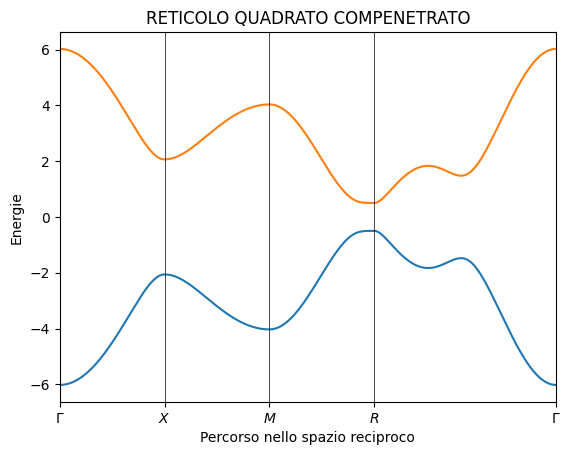

In [103]:



from __future__ import print_function
from pythtb import * # import TB model class
import numpy as np
import matplotlib.pyplot as plt

# define lattice vectors
lat=[[1.,0.,0,],[0.,1.,0.],[0.,0.,1.]]

# define coordinates of orbitals

orb=[[0.0,0.0,0.0],[0.5,0.0,0.0]]


# make zero dimensional tight-binding model
my_model=tb_model(3,3,lat,orb)



path = [0.0,0.0,0.0],[0.5,0.,0.], [0.5,0.5,0.], [0.5,0.5,0.5],[0.,0.0,0.]
(k_vec,k_dist,k_node) = my_model.k_path(path, 1400)
k_label = ["$\Gamma$", "$X$", "$M$","$R$", "$\Gamma$"]

# set model parameters
delta=0.5
t1 = -1.0 # C=C
t2 = -0.5 # C-C / C-H  


# change on-site energies so that N and H don't have the same energy
my_model.set_onsite([-delta,delta])

# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j)
# Hamiltonian dressing: setti gli elementi extradiagonali




my_model.set_hop(t1,0, 1, [0.,0.,  0.0])
my_model.set_hop(t1,1, 0, [1.,1.,  0.0])
my_model.set_hop(t1,1, 0, [1.,-1., 0.0])
my_model.set_hop(t1,1, 0, [0.,-1., 0.0])
my_model.set_hop(t1,1, 0, [0,0., 1.0])
my_model.set_hop(t1,1, 0, [0.,0.,  -1.0])








# print tight-binding model
my_model.display()


print('---------------------------------------')
print('starting calculation')
print('---------------------------------------')
print('Calculating bands...')
print()
print('Band energies')
print()    


# solve for eigenenergies of hamiltonian
evals=my_model.solve_all(k_vec)


fig, ax = plt.subplots()
for j in range(0,len(evals)):
    ax.plot(k_dist,evals[j])


ax.set_title("RETICOLO QUADRATO COMPENETRATO")
ax.set_xlabel("Percorso nello spazio reciproco")
ax.set_ylabel("Energie")
ax.set_xticks(k_node)
ax.set_xticklabels(k_label)
ax.set_xlim(k_node[0],k_node[-1])

for n in range(len(k_node)):
    ax.axvline(x=k_node[n], linewidth=0.5,color='k')


print('Done.\n')